In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

In [2]:
def cls_count(txt_file):
    video_id = []
    frame = []
    cls = []
    with open(txt_file, 'r') as file:
        for line in file:
            v, f, _, _, _, _, c = line.split(',')
            video_id.append(v.strip())
            frame.append(f.strip())
            cls.append(c.strip())     
    file.close()
    df = pd.DataFrame({"video_id":video_id,
                       "frame": frame,
                       "class": cls})
    
    return df, df['class'].value_counts().sort_index(ascending=True)


def read_txt_file(txt_file):
    with open(txt_file, 'r') as file:
        lines = file.readlines()
    annotations = [line.strip().split(',') for line in lines]
    return annotations

def draw_bboxes(imgs_dir, annotations, v_id, f_id):
    imgs = os.listdir(imgs_dir)
    # image name format: f'v{video_id}_f{frame_id}.jpg'
    img_name = next((name for name in imgs if name == f'v{v_id}_f{f_id}.jpg'), None)
     
    if img_name is None:
        print("Cannot find the image")
        return

    img_path = os.path.join(imgs_dir, img_name)
    img = Image.open(img_path)
    fig, ax = plt.subplots(1)
    ax.imshow(img)
    
    bbox_ann = []
    for ann in annotations:
        if int(ann[0]) == v_id and int(ann[1]) == f_id:
            bbox_ann.append(ann)
    
    for ann in bbox_ann:
        video_id, frame, bb_left, bb_top, bb_width, bb_height, class_id = ann
        
        # class 1, motorbike
        if int(class_id)==1:
            bbox = patches.Rectangle((float(bb_left), float(bb_top)), float(bb_width), float(bb_height), 
                                     linewidth=2, edgecolor='red', facecolor='none')
            ax.add_patch(bbox)
            plt.annotate(class_id, (float(bb_left), float(bb_top)), color='white', 
                             backgroundcolor='red', fontsize=10, ha='left')
            
        # class 2, DHelmet
        if int(class_id)==2:
            bbox = patches.Rectangle((float(bb_left), float(bb_top)), float(bb_width), float(bb_height), 
                                     linewidth=2, edgecolor='blue', facecolor='none')
            ax.add_patch(bbox)
            plt.annotate(class_id, (float(bb_left), float(bb_top)), color='white', 
                             backgroundcolor='blue', fontsize=10, ha='left')
            
        # class 3, DNoHelmet
        if int(class_id)==3:
            bbox = patches.Rectangle((float(bb_left), float(bb_top)), float(bb_width), float(bb_height), 
                                     linewidth=2, edgecolor='green', facecolor='none')
            ax.add_patch(bbox)
            plt.annotate(class_id, (float(bb_left), float(bb_top)), color='white', 
                             backgroundcolor='green', fontsize=10, ha='left')
            
        # class 4, P1Helmet
        if int(class_id)==4:
            bbox = patches.Rectangle((float(bb_left), float(bb_top)), float(bb_width), float(bb_height), 
                                     linewidth=2, edgecolor='yellow', facecolor='none')
            ax.add_patch(bbox)
            plt.annotate(class_id, (float(bb_left), float(bb_top)), color='white', 
                             backgroundcolor='yellow', fontsize=10, ha='left')
            
        # class 5, P1NoHelmet
        if int(class_id)==5:
            bbox = patches.Rectangle((float(bb_left), float(bb_top)), float(bb_width), float(bb_height), 
                                     linewidth=2, edgecolor='purple', facecolor='none')
            ax.add_patch(bbox)
            plt.annotate(class_id, (float(bb_left), float(bb_top)), color='white', 
                             backgroundcolor='purple', fontsize=10, ha='left')
            
        # class 6, P2Helmet
        if int(class_id)==6:
            bbox = patches.Rectangle((float(bb_left), float(bb_top)), float(bb_width), float(bb_height), 
                                     linewidth=2, edgecolor='cyan', facecolor='none')
            ax.add_patch(bbox)
            plt.annotate(class_id, (float(bb_left), float(bb_top)), color='white', 
                             backgroundcolor='cyan', fontsize=10, ha='left')
            
        # class 7, P2NoHelmet
        if int(class_id)==7:
            bbox = patches.Rectangle((float(bb_left), float(bb_top)), float(bb_width), float(bb_height), 
                                     linewidth=2, edgecolor='orange', facecolor='none')
            ax.add_patch(bbox)
            plt.annotate(class_id, (float(bb_left), float(bb_top)), color='white', 
                             backgroundcolor='orange', fontsize=10, ha='left')
            
        # class 8, P0Helmet
        if int(class_id)==8:
            bbox = patches.Rectangle((float(bb_left), float(bb_top)), float(bb_width), float(bb_height), 
                                     linewidth=2, edgecolor='pink', facecolor='none')
            ax.add_patch(bbox)
            plt.annotate(class_id, (float(bb_left), float(bb_top)), color='white', 
                             backgroundcolor='pink', fontsize=10, ha='left')
            
        # class 9, P0NoHelmet
        if int(class_id)==9:
            bbox = patches.Rectangle((float(bb_left), float(bb_top)), float(bb_width), float(bb_height), 
                                     linewidth=2, edgecolor='brown', facecolor='none')
            ax.add_patch(bbox)
            plt.annotate(class_id, (float(bb_left), float(bb_top)), color='white', 
                             backgroundcolor='brown', fontsize=10, ha='left')

    plt.show()

In [4]:
txt_file = '../datasets/raw_dataset/gt.txt'
df, series = cls_count(txt_file)
display(series)

class
1    34206
2    26246
3     6636
4       95
5     4698
7       78
8        1
9       47
Name: count, dtype: int64

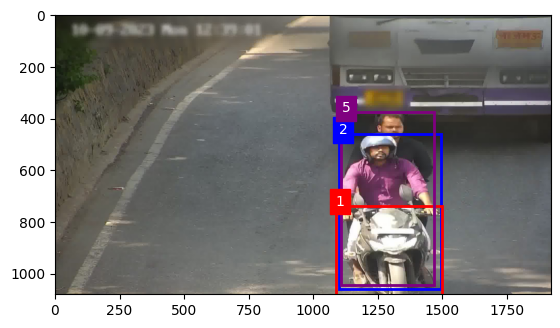

In [5]:
annotations = read_txt_file(txt_file)
imgs_dir = '../datasets/raw_dataset/images/train'
draw_bboxes(imgs_dir, annotations, 1, 90)